## Activity 1 Water adsorbed on Ni surface

You've received a trajectory file from your colleague, who conducted a simulation on $H_2O$ molecules. He's now eager to adsorb these water molecules onto a $Ni$ $(1,1,1)$ surface for exploring  further properties. Leverage ASE to craft the necessary geometry, and then save it as a POSCAR file. This way, you can hand it over to him to conduct the subsequent simulations. Minimum distance of the water molecules from the surface is to be$ 1.5 A^{\circ}$

In [234]:
import ase
import ase.io
import ase.visualize 
import ase.build

Desired results:


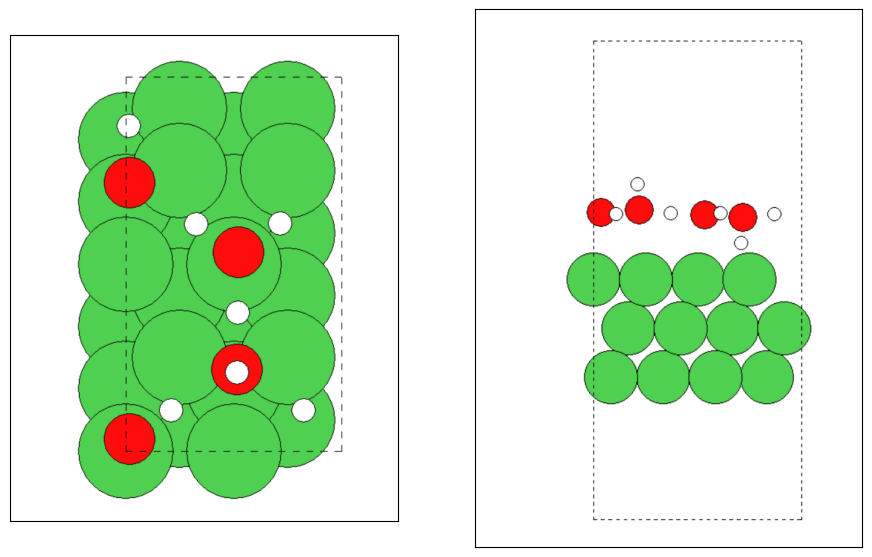

In [235]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

rcParams['figure.figsize'] = 11 ,8
img_A = mpimg.imread('z.png')
img_B = mpimg.imread('x.png')
print("Desired results:")
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
plt.show()

In [236]:
import ase
from ase.visualize import view
from ase.io import read
from ase.build import fcc111

In [237]:
W = read('WL.traj')
slab = fcc111('Ni', size=[2, 4, 3], a=3.55, orthogonal=True)

In [238]:
# ase.visualize.view(W)
# ase.visualize.view(slab)

In [239]:
cell_w = W.get_cell()
print(cell_w)

position_w = W.positions
print(position_w)

cell_ni = slab.get_cell()
print(cell_ni)

position_ni = slab.positions

print(position_ni)

Cell([8.490373, 4.901919, 26.93236])
[[ 0.27802511 -0.07732213 13.46649107]
 [ 0.91833251 -1.02565868 13.41456626]
 [ 0.91865997  0.87076761 13.41228287]
 [ 1.85572027  2.37336781 13.56440907]
 [ 3.13987926  2.3633134  13.4327577 ]
 [ 1.77566079  2.37150862 14.66528237]
 [ 4.52240322  2.35264513 13.37435864]
 [ 5.16892729  1.40357034 13.42661052]
 [ 5.15567324  3.30068395 13.4305779 ]
 [ 6.10183518 -0.0738656  13.27945071]
 [ 7.3856151  -0.07438536 13.40814585]
 [ 6.01881192 -0.08627583 12.1789428 ]]
Cell([5.020458146424487, 8.695688586880282, 0.0])
[[1.25511454 0.72464072 0.        ]
 [3.76534361 0.72464072 0.        ]
 [0.         2.89856286 0.        ]
 [2.51022907 2.89856286 0.        ]
 [1.25511454 5.07248501 0.        ]
 [3.76534361 5.07248501 0.        ]
 [0.         7.24640716 0.        ]
 [2.51022907 7.24640716 0.        ]
 [0.         1.44928143 2.04959346]
 [2.51022907 1.44928143 2.04959346]
 [1.25511454 3.62320358 2.04959346]
 [3.76534361 3.62320358 2.04959346]
 [0.        

In [240]:
print(cell_w[1,1],cell_w[0,0])
# ase.visualize.view(W)

4.901919 8.490373


In [241]:
W.set_cell([cell_w[1,1],cell_w[0,0],0.0])
print(W.get_cell())
ase.visualize.view(W)
W.rotate(90, 'z', center=(0, 0, 0))  # rotate the position
ase.visualize.view(W)

Cell([4.901919, 8.490373, 0.0])


<Popen: returncode: None args: ['c:\\Users\\skraw\\AppData\\Local\\Programs\...>

## set_cell(cell, scale_atoms=False, apply_constraint=True)
Set unit cell vectors.

Parameters:

cell: 3x3 matrix or length 3 or 6 vector
Unit cell. A 3x3 matrix (the three unit cell vectors) or just three numbers for an orthorhombic cell. Another option is 6 numbers, which describes unit cell with lengths of unit cell vectors and with angles between them (in degrees), in following order: [len(a), len(b), len(c), angle(b,c), angle(a,c), angle(a,b)]. First vector will lie in x-direction, second in xy-plane, and the third one in z-positive subspace.

scale_atoms: bool
Fix atomic positions or move atoms with the unit cell? Default behavior is to not move the atoms (scale_atoms=False).

apply_constraint: bool
Whether to apply constraints to the given cell.

Examples:

Two equivalent ways to define an orthorhombic cell:

- atoms = Atoms('He')
- a, b, c = 7, 7.5, 8
- atoms.set_cell([a, b, c])
- atoms.set_cell([(a, 0, 0), (0, b, 0), (0, 0, c)])

FCC unit cell:

- atoms.set_cell([(0, b, b), (b, 0, b), (b, b, 0)])

Rhombohedral unit cell:

- alpha = 77
- atoms.set_cell([a, a, a, alpha, alpha, alpha])

In [242]:
for i in range(len(position_w)):
    x = position_w[i][0]
    if x<0:
        W.positions[i][0] = cell_w[1][1]+position_w[i][0]


W.set_cell(cell_ni, scale_atoms=True) 
print(position_w)
print(position_w[:,2])  # z coordinate of position h20

zmin = position_w[:,2].min()
W.positions += (0,0,-zmin +1.5) 

print(W.positions)

W.translate((0,0,position_ni[:,2].max()))

ase.visualize.view(W)


[[ 0.07919195  0.28474836 13.46649107]
 [ 1.05046136  0.94053978 13.41456626]
 [ 4.12863347  0.94087516 13.41228287]
 [ 2.5896971   1.9005956  13.56440907]
 [ 2.59999465  3.21580833 13.4327577 ]
 [ 2.59160125  1.81860011 14.66528237]
 [ 2.6109209   4.63176471 13.37435864]
 [ 3.5829464   5.29392313 13.42661052]
 [ 1.63995642  5.28034857 13.4305779 ]
 [ 0.07565183  6.24939076 13.27945071]
 [ 0.07618416  7.56421525 13.40814585]
 [ 0.08836217  6.16435981 12.1789428 ]]
[13.46649107 13.41456626 13.41228287 13.56440907 13.4327577  14.66528237
 13.37435864 13.42661052 13.4305779  13.27945071 13.40814585 12.1789428 ]
[[0.07919195 0.28474836 2.78754827]
 [1.05046136 0.94053978 2.73562346]
 [4.12863347 0.94087516 2.73334007]
 [2.5896971  1.9005956  2.88546627]
 [2.59999465 3.21580833 2.7538149 ]
 [2.59160125 1.81860011 3.98633957]
 [2.6109209  4.63176471 2.69541584]
 [3.5829464  5.29392313 2.74766772]
 [1.63995642 5.28034857 2.7516351 ]
 [0.07565183 6.24939076 2.60050791]
 [0.07618416 7.56421525 

<Popen: returncode: None args: ['c:\\Users\\skraw\\AppData\\Local\\Programs\...>

In [243]:
interface = slab+W
interface.set_cell([cell_ni[0,0],cell_ni[1,1],15]) # setting the cell of interface
interface.center(axis=2)  # to keep all nickel atom in center
view(interface)

<Popen: returncode: None args: ['c:\\Users\\skraw\\AppData\\Local\\Programs\...>

## ------------------------------------------------------------ END -------------------------------------------------------------

## Activity 2: Water adsorption on Graphene sites

My surface is monolayer graphene. I want to add a layer of water as adsorbate at a height of 3.31 $^{\circ}$
  from top of the slab; Coverage = 24/72. Required image is as shown below

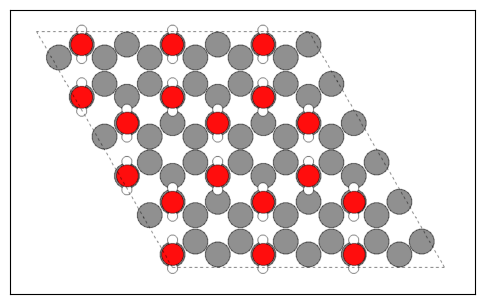

In [244]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4
img = mpimg.imread('gra_h2o.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [245]:
import numpy as np
import ase.io
import ase.build
from ase.visualize import view
from ase.build import add_adsorbate
from ase import Atoms

In [246]:
slab = ase.build.graphene(formula='C2',a=2.46,size=(6,6,1))
slab.center()    
water = ase.build.molecule('H2O')
h = 3.31

In [248]:
positions = slab.positions

a = positions[:,1].min()
print(a)
index = []

for i in range(len(positions)):
    if positions[i,1] == a:
        index.append(i)

print(index)

start_index = index[::2]

for i in start_index: 
    x = positions[i,0]
    y = positions[i,1]

    add_adsorbate(slab,adsorbate=water, height=h, position=(x,y),offset = None, mol_index=0)

    for j in range(i,len(positions)-1):

        dist = ((positions[j,0]-positions[i,0])**2+(positions[j,1]-positions[i,1])**2)**0.5

        if 2.84 < dist <2.842:
            x = positions[j,0]
            y = positions[j,1]

            add_adsorbate(slab,adsorbate=water, height=h,position=(x,y),offset=None,mol_index=0)
            i=j
        continue


view(slab)
lat = 6*np.array([[2.46,0,0],[-2.46/2,(3**0.5)*(2.46/2),0],[0,0,1]])
slab.set_cell(lat)
slab.write('POSCAR_GRAPHENE',format='vasp')




0.7101408311032387
[0, 12, 24, 36, 48, 60]


## ------------------------------------------------------------ END -------------------------------------------------------------

## Activity 3: Graphene twisted bilayer 

Generate a twisted bilayer graphene nano ribbon of dimensions 10 nm x 5 nm. Relative twist angle is to be $30^{\circ}$. Ensure AA stacking. Step 1 has been done for you.   

Desired results:


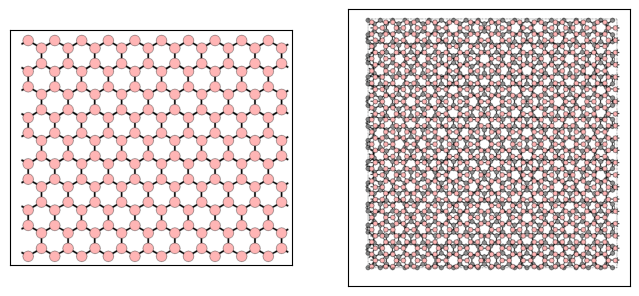

In [250]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
rcParams['figure.figsize'] = 8 ,8
img_A = mpimg.imread('monolayer_graphene.png')
img_B = mpimg.imread('bilayer_graphene.png')
print("Desired results:")
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_A)
ax[1].imshow(img_B)
for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
plt.show()

In [256]:
import os
import numpy as np
import ase
import ase.io
import ase.build
import ase.visualize
import math
from ase import Atoms
from ase.build import cut
from ase.build import stack
from ase.build import rotate
from ase.visualize import view

In [257]:
a=1.42
a1=(2*a*math.cos(math.pi/6))
a2=3*a
d=3.35
theta = 30
lx = 100
ly = 50

In [259]:
atoms1=Atoms(
symbols='C4',
positions=[(0,0,0),(a1/2,a2/6,0),(a1/2,a2/2,0),(0,2*a2/3,0)],
cell=[(a1,0,0),(0,a2,0),(0,0,3.35)],
pbc=[1,0,0]
)
atoms2=Atoms(
symbols='B4',
positions=[(0,0,0),(a1/2,a2/6,0),(a1/2,a2/2,0),(0,2*a2/3,0)],
cell=[(a1,0,0),(0,a2,0),(0,0,3.35)],
pbc=[1,0,0]
)

view(atoms1)
view(atoms2)

<Popen: returncode: None args: ['c:\\Users\\skraw\\AppData\\Local\\Programs\...>

In [262]:
layer1=atoms1*[lx,ly,1]
layer2=atoms2*[3*lx,3*ly,1]
layer2.translate([-lx*a1,-ly*a2,d])

bilayer = layer1 + layer2

In [263]:
pos = np.array(bilayer.get_positions())
indices = [atom.index for atom in bilayer]
del_index1 = []
del_index2 = []
del_index3 = []
del_index4 = []

for i in indices:
    if pos[i][0]>lx:
        del_index1.append(i)
    if pos[i][0]<0:
        del_index2.append(i)
    if pos[i][1]>ly:
        del_index3.append(i)
    if pos[i][1]<0:
        del_index4.append(i)
            
del_index = del_index1+del_index2+del_index3+del_index4
del_index = [*set(del_index)] # Removes duplicates from the lists

del bilayer [del_index]
    
bilayer.set_cell([lx,ly,15])
view(bilayer)

<Popen: returncode: None args: ['c:\\Users\\skraw\\AppData\\Local\\Programs\...>

## ------------------------------------------------------------ END -------------------------------------------------------------

## Activity 4

Generating a GIF image. Water molecule enclosed by a Fullerene unit cell

c:\Users\skraw\AppData\Local\Programs\Python\Python312\Lib\site-packages\ase\visualize\plot.py:59: UserWarning: You passed in an explicit save_count=100 which is being ignored in favor of len(frames)=61.
  animation = FuncAnimation(fig, drawimage, frames=images,
MovieWriter ffmpeg unavailable; using Pillow instead.


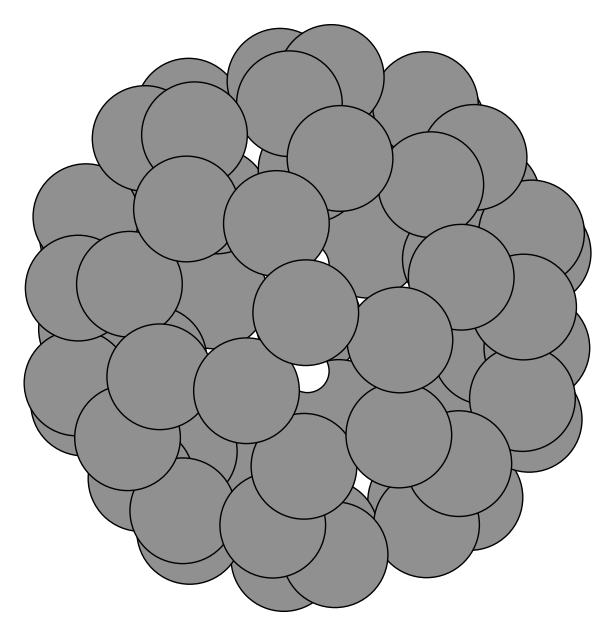

In [255]:
water = ase.build.molecule('H2O')
water.center()

fullerene = ase.build.molecule('C60')
fullerene.center()

start_atom = 0
distances = fullerene.get_all_distances()[start_atom]
sorted_fullerene_indices = sorted(enumerate(distances),
                              key = (lambda x: x[1]))
sorted_fullerene_indices = [i for i, _ in sorted_fullerene_indices]
sorted_fullerene = fullerene[sorted_fullerene_indices]

frames = [water.copy()]

for i in range(len(sorted_fullerene)):
    frames.append(water + sorted_fullerene[:i + 1])

from ase.io.animation import write_gif
_ = write_gif('wrapped_molecule.gif', frames)